In [3]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

In [4]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
conv_filter = 32

In [6]:
(X_train_, y_train), (X_test_, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 47s 0us/step


In [7]:
print('X_train shape:', X_train_.shape)
print('train samples:', X_train_.shape[0])
print('test samples:', X_test_.shape[0])

X_train shape: (50000, 32, 32, 3)
train samples: 50000
test samples: 10000


In [8]:
num_train, img_rows, img_cols, img_channels = X_train_.shape

In [9]:
# image dimension:
input_shape = (img_rows, img_cols, 3)

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
n_classes = len(np.unique(y_train))
n_classes

10

In [15]:
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

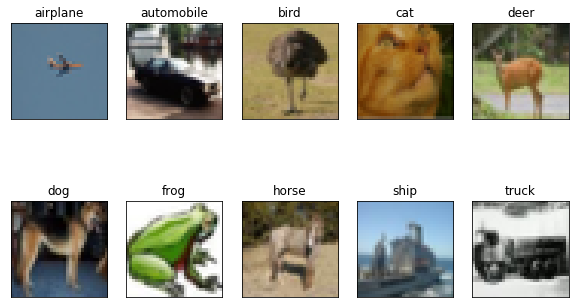

In [19]:
fig = plt.figure(figsize=(10,6))
for i in range(n_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train_[idx, ::]
    img_num = np.random.randint(features_idx.shape[0])
    image = features_idx[img_num, ::].reshape((32, 32, 3))
    ax.set_title(class_names[i])
    plt.imshow(image)
plt.show()

In [32]:
# Normalize the input data
X_train = X_train_.astype('float32')/255.
X_test = X_test_.astype('float32')/255.

In [34]:
# One-hot encode the labels
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.3))

In [56]:
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.3))

In [57]:
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))

In [58]:
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=n_classes, activation='softmax'))

In [59]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [60]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [61]:
#Define a callback to prevent overfitting
callbacks = [EarlyStopping(monitor='val_acc', patience=5)]
#monitor: quantity to be monitored
#patience: number of epochs with no improvement after which training will be stopped

In [62]:
#hyperparameters
batch_size = 128
n_epochs = 20

In [63]:
results = model.fit(X_train_, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1,
                   validation_data=(X_test_, y_test), callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 171us/step - loss: 1.9010 - acc: 0.3587 - val_loss: 1.4161 - val_acc: 0.4880
Epoch 2/20
50000/50000 [==============================] - 7s 145us/step - loss: 1.2878 - acc: 0.5407 - val_loss: 1.1373 - val_acc: 0.5913
Epoch 3/20
50000/50000 [==============================] - 8s 152us/step - loss: 1.0537 - acc: 0.6255 - val_loss: 1.0161 - val_acc: 0.6440
Epoch 4/20
50000/50000 [==============================] - 7s 148us/step - loss: 0.9330 - acc: 0.6710 - val_loss: 0.8564 - val_acc: 0.6942
Epoch 5/20
50000/50000 [==============================] - 7s 143us/step - loss: 0.8394 - acc: 0.7051 - val_loss: 0.7842 - val_acc: 0.7261
Epoch 6/20
50000/50000 [==============================] - 7s 145us/step - loss: 0.7719 - acc: 0.7290 - val_loss: 0.7165 - val_acc: 0.7452
Epoch 7/20
50000/50000 [==============================] - 7s 143us/step - loss: 0.7170 - acc: 0.7509 - val_loss: 0.6461 - 

In [51]:
# model.save_weights('cifar10_weight.h5', overwrite=True)
# model.save('cifar10.h5')
# from keras.models import load_model
# loaded model = load_model('cifar10.h5')